# Assignment 9
## Due June 26th
### names:

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg as LA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from scipy.stats import expon
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LinearRegression, LogisticRegression
import networkx as nx
from scipy.linalg import eigh
from sklearn.neighbors import NearestNeighbors, kneighbors_graph
from sklearn.utils.graph_shortest_path import graph_shortest_path

np.random.seed(42)

## Exercise 1

In [76]:
X, y = load_breast_cancer(return_X_y=True)
shuffled_idx = np.random.permutation(len(X))
X, y = X[shuffled_idx], y[shuffled_idx]
len_test = len(X) // 3 * 2
X_train, X_test = X[:len_test], X[len_test:]
y_train, y_test = y[:len_test], y[len_test:]

In [77]:
parameters = {'C':[0.01, 0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10, 100]}

In [78]:
param_dist = {'C': expon(), 'gamma': expon()}

### a)

In [79]:
svm = SVC(kernel="rbf")
grid_cv = GridSearchCV(estimator=svm, param_grid=parameters)
grid_cv.fit(X_train, y_train)
grid_cv.best_params_

{'C': 10, 'gamma': 0.01}

### b)

In [80]:
random_cv = RandomizedSearchCV(estimator=svm,n_iter=100, param_distributions=param_dist)
random_cv.fit(X_train, y_train)
random_cv.best_params_

{'C': 2.4936924895208556, 'gamma': 0.005314101255462206}

In [81]:
random_cv_2 = RandomizedSearchCV(estimator=svm,n_iter=1000, param_distributions=param_dist)
random_cv_2.fit(X_train, y_train)
random_cv_2.best_params_

{'C': 1.986902491820347, 'gamma': 0.0021060593628231825}

### c)

In [82]:
grid_cv_score = grid_cv.score(X_test, y_test)
random_cv_score = random_cv.score(X_test, y_test)
random_cv_2_score = random_cv_2.score(X_test, y_test)
print("Score grid cv: %f"%grid_cv_score)
print("Score Random cv n= 100: %f"%random_cv_score)
print("Score Random cv n= 1000: %f"%random_cv_2_score)

Score grid cv: 0.602094
Score Random cv n= 100: 0.664921
Score Random cv n= 1000: 0.884817


## Exercise 2

### a)

In [2]:
def MDS(D, d):
    #d = num dims
    
    # Number of points                                                                        
    n = len(D)
     
    # compute matrix S
    S = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            S[i][j] = 0.5*(D[1][i]**2 + D[1][j]**2 - D[i][j]**2)
    
    #eigendecomp
    eigvalues, eigvectors = eigh(S)
    
    #X
    Vd = eigvectors[:,-d:] #letzte d zeilen (die groessten)
    Vald = eigvalues[-d:]
    diag = np.diag(Vald)
    X = np.dot(Vd, np.sqrt(diag))
    
    return X
    



### b)

In [84]:
eurocity_dataframe = pd.read_csv('eurodist.csv', index_col=0, header=0)
eurocity_dataframe



,Athens,Barcelona,Brussels,Calais,Cherbourg,Cologne,Copenhagen,Geneva,Gibraltar,Hamburg,...,Lisbon,Lyons,Madrid,Marseilles,Milan,Munich,Paris,Rome,Stockholm,Vienna
Athens,0,3313,2963,3175,3339,2762,3276,2610,4485,2977,...,4532,2753,3949,2865,2282,2179,3000,817,3927,1991
Barcelona,3313,0,1318,1326,1294,1498,2218,803,1172,2018,...,1305,645,636,521,1014,1365,1033,1460,2868,1802
Brussels,2963,1318,0,204,583,206,966,677,2256,597,...,2084,690,1558,1011,925,747,285,1511,1616,1175
Calais,3175,1326,204,0,460,409,1136,747,2224,714,...,2052,739,1550,1059,1077,977,280,1662,1786,1381
Cherbourg,3339,1294,583,460,0,785,1545,853,2047,1115,...,1827,789,1347,1101,1209,1160,340,1794,2196,1588
Cologne,2762,1498,206,409,785,0,760,1662,2436,460,...,2290,714,1764,1035,911,583,465,1497,1403,937
Copenhagen,3276,2218,966,1136,1545,760,0,1418,3196,460,...,2971,1458,2498,1778,1537,1104,1176,2050,650,1455
Geneva,2610,803,677,747,853,1662,1418,0,1975,1118,...,1936,158,1439,425,328,591,513,995,2068,1019
Gibraltar,4485,1172,2256,2224,2047,2436,3196,1975,0,2897,...,676,1817,698,1693,2185,2565,1971,2631,3886,2974
Hamburg,2977,2018,597,714,1115,460,460,1118,2897,0,...,2671,1159,2198,1479,1238,805,877,1751,949,1155


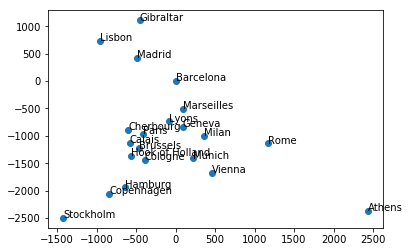

In [86]:
embeddedX = np.squeeze(MDS(eurocity_dataframe.values, 2))
plt.scatter(embeddedX[:,0],embeddedX[:,1])

for i in range(len(embeddedX)):
    plt.annotate(eurocity_dataframe.columns[i],xy=embeddedX[i])

### c)


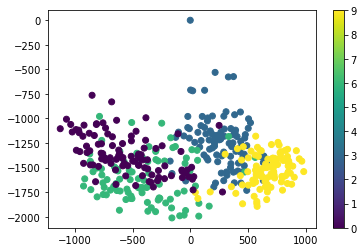

In [4]:
train_df = pd.read_csv('USPS.csv', sep='\t',)
X = train_df.drop(['Label'], axis=1).values
y = train_df['Label'].values
idx = np.any([y == 0, y == 3, y == 6, y == 9], axis=0)
X = X[idx]
y = y[idx]

dist = euclidean_distances(X)
USPSres = MDS(dist, 2)
plt.scatter(USPSres[:,0],USPSres[:,1], c=y)
plt.colorbar()


# Exercise 3)

### a)

In [42]:
def isomap(D, k, d):
    neighbors = NearestNeighbors(n_neighbors=k).fit(D)
    indices, distances = neighbors.kneighbors(D)
    #Construct k nearest neighbors graph
    knn_graph = kneighbors_graph(neighbors, n_neighbors=k, mode="distance")
    distances = graph_shortest_path(knn_graph, method="D")
    #apply mds
    result = MDS(distances, d)
    
    return result



### b)

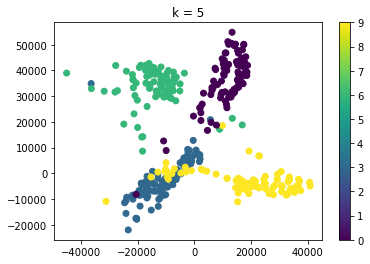

In [36]:
result = isomap(dist, 5, 2)
plt.title("k = 5")
plt.scatter(result[:,0],result[:,1], c=y)
plt.colorbar()

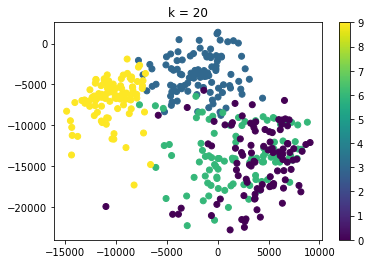

In [38]:
result = isomap(dist, 20, 2)
plt.title("k = 20")
plt.scatter(result[:,0],result[:,1], c=y)
plt.colorbar()

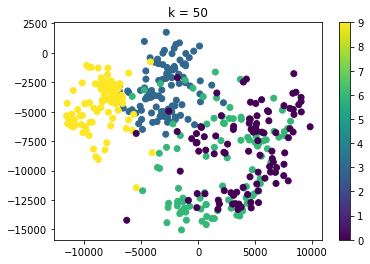

In [39]:
result = isomap(dist, 50, 2)
plt.title("k = 50")
plt.scatter(result[:,0],result[:,1], c=y)
plt.colorbar()

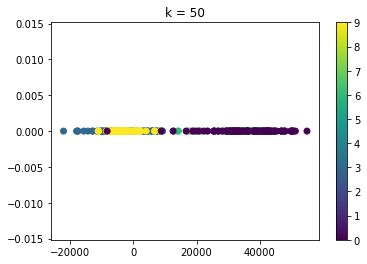

In [45]:
result = isomap(dist, 5, 1)
plt.title("k = 50")
plt.scatter(result[:,0],np.zeros(len(result)), c=y)
plt.colorbar()